In [49]:
import keras
import numpy
import matplotlib.pyplot as plt
import pandas
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

plt.style.use('default')

In [52]:
# database

In [53]:
arquivo = 'viskositas_data.csv'
dados = pandas.read_csv(arquivo, delimiter=';')
dados

# chemical composition in %mass
# temperature (T) in °C
# viscosity (N) in Pa.s

,CaO,SiO2,MgO,Al2O3,TiO2,MnO,FeO,CaF2,Na2O,Li2O,B2O3,K2O,ZrO2,Fe2O3,P2O5,NiO,SO3,Cr2O3,V2O5,T,N
0,0.113427,0.704243,0.000000,0.182330,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1549.85,145.091133
1,0.077224,0.717928,0.000000,0.204847,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1549.85,132.163712
2,0.087582,0.730126,0.000000,0.182292,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1549.85,137.400402
3,0.080473,0.719925,0.000000,0.199602,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1549.85,134.299465
4,0.077517,0.718123,0.000000,0.204360,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1549.85,132.158475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6946,0.150006,0.399979,0.199981,0.199979,0.0,0.0,0.050055,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1262.85,45.498806
6947,0.150006,0.399979,0.199981,0.199979,0.0,0.0,0.050055,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1288.85,25.003454
6948,0.150006,0.399979,0.199981,0.199979,0.0,0.0,0.050055,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1293.85,23.823195
6949,0.150006,0.399979,0.199981,0.199979,0.0,0.0,0.050055,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1309.85,18.197009


In [54]:
# data description 
dados.describe()

,CaO,SiO2,MgO,Al2O3,TiO2,MnO,FeO,CaF2,Na2O,Li2O,B2O3,K2O,ZrO2,Fe2O3,P2O5,NiO,SO3,Cr2O3,V2O5,T,N
count,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6.951000e+03
mean,3.843777,4.568930,0.420240,1.178437,0.131113,0.317599,0.890707,0.412048,0.191294,0.009458,0.097281,0.011223,0.000432,0.652602,0.000423,0.000069,0.000331,0.000244,0.000474,1392.381574,1.029330e+10
std,10.956742,11.750259,2.072110,4.006970,1.768172,3.173790,4.843142,2.593400,1.116148,0.184110,1.077129,0.036043,0.020772,6.555960,0.001701,0.000648,0.001448,0.002341,0.004217,216.069014,2.443127e+11
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,682.950000,2.000000e-03
25%,0.015693,0.510253,0.000000,0.085084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1297.485069,1.391578e+00
50%,0.106799,0.642055,0.000000,0.195847,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1400.000000,1.897812e+02
75%,0.250000,0.700590,0.011784,0.242011,0.000261,0.000000,0.000000,0.000000,0.051035,0.000000,0.000000,0.002945,0.000000,0.018626,0.000000,0.000000,0.000000,0.000000,0.000000,1499.850000,2.825184e+03
max,78.000000,59.400000,22.500000,33.500000,43.000000,56.000000,47.100000,34.600000,12.500000,8.000000,31.020000,0.480012,1.000000,85.100000,0.041069,0.011683,0.020158,0.034279,0.071777,2481.850000,7.444889e+12


In [55]:
# data info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6951 entries, 0 to 6950
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CaO     6951 non-null   float64
 1   SiO2    6951 non-null   float64
 2   MgO     6951 non-null   float64
 3   Al2O3   6951 non-null   float64
 4   TiO2    6951 non-null   float64
 5   MnO     6951 non-null   float64
 6   FeO     6951 non-null   float64
 7   CaF2    6951 non-null   float64
 8   Na2O    6951 non-null   float64
 9   Li2O    6951 non-null   float64
 10  B2O3    6951 non-null   float64
 11  K2O     6951 non-null   float64
 12  ZrO2    6951 non-null   int64  
 13  Fe2O3   6951 non-null   float64
 14  P2O5    6951 non-null   float64
 15  NiO     6951 non-null   float64
 16  SO3     6951 non-null   float64
 17  Cr2O3   6951 non-null   float64
 18  V2O5    6951 non-null   float64
 19  T       6951 non-null   float64
 20  N       6951 non-null   float64
dtypes: float64(20), int64(1)
memory usage

In [56]:
# data preprocessing

In [57]:
# NBO/T — depolymerisation parameter
# http://dx.doi.org/10.2355/isijinternational.ISIJINT-2015-364

dados = pandas.read_csv(arquivo, delimiter=';')
dados = dados.drop(['N', 'T'], axis=1)

cao, sio2, al2o3, mgo = 56.0774, 72.1704, 101.9612, 40.3044
tio2, mno, feo, caf2 = 79.8658, 70.9374, 71.8444, 78.0748
na2o, li2o, b2o3, k2o = 54.9886, 38.9398, 69.6202, 94.1960
zro2, fe2o3, p2o5, nio =  123.2228, 199.5608, 191.944, 74.6928
so3, cr2o3, v2o5 = 80.03, 151.99, 181.88

dados['CaO'], dados['SiO2'] = dados['CaO']/cao, dados['SiO2']/sio2
dados['Al2O3'], dados['MgO'] = dados['Al2O3']/al2o3, dados['MgO']/mgo
dados['TiO2'], dados['MnO'] = dados['TiO2']/tio2, dados['MnO']/mno
dados['FeO'], dados['CaF2'] = dados['FeO']/feo, dados['CaF2']/caf2
dados['Na2O'], dados['Li2O'] = dados['Na2O']/na2o, dados['Li2O']/li2o
dados['B2O3'], dados['K2O'] = dados['B2O3']/b2o3, dados['K2O']/k2o
dados['ZrO2'], dados['Fe2O3'] = dados['ZrO2']/zro2, dados['Fe2O3']/fe2o3
dados['P2O5'], dados['NiO'] = dados['P2O5']/p2o5, dados['NiO']/nio
dados['SO3'], dados['Cr2O3'] = dados['SO3']/so3, dados['Cr2O3']/cr2o3
dados['V2O5'] = dados['V2O5']/v2o5

dados = dados.values

a1 = []
for i in range(0, len(dados)):        
    a1 = a1 + [dados[i].sum()]
    for j in range(0, len(dados[i])):
        dados[i][j] = dados[i][j]/ a1[i]

colRename = {0:'CaO', 1:'SiO2', 2:'MgO', 3:'Al2O3', 4:'TiO2', 5:'MnO',
6:'FeO', 7:'CaF2', 8:'Na2O', 9:'Li2O', 10:'B2O3', 11:'K2O',
12:'ZrO2', 13:'Fe2O3', 14:'P2O5', 15:'NiO', 16:'SO3', 17:'Cr2O3', 18:'V2O5'}

dados = pandas.DataFrame(dados)
dados = dados.rename(columns = colRename)

nbot = 2*(dados['CaO'] + dados['MgO'] + dados['MnO'] + dados['FeO'] + dados['NiO']\
+ dados['Na2O'] + dados['Li2O'] + dados['K2O'] \
- (dados['Al2O3'] + dados['B2O3'] + dados['Fe2O3'] + dados['Cr2O3'])) / \
(dados['SiO2'] + dados['ZrO2'] + dados['TiO2']\
- 2*(dados['Al2O3'] + dados['B2O3'] + dados['Fe2O3'] + dados['Cr2O3']))
pandas.DataFrame(nbot, columns=['NBO/T'])

,NBO/T
0,0.075859
1,-0.213158
2,-0.069117
3,-0.172469
4,-0.209354
...,...
6946,7.869294
6947,7.869294
6948,7.869294
6949,7.869294


In [58]:
# Tliq — liquidus temperature
# http://dx.doi.org/10.2355/isijinternational.ISIJINT-2015-364

dados = pandas.read_csv(arquivo, delimiter=';')
dados = dados.drop(['N', 'T'], axis=1).values

a1 = []
for i in range(0, len(dados)):
    a1 = a1 + [dados[i].sum()]
    for j in range(0, len(dados[i])):
        dados[i][j] = dados[i][j]/ a1[i]

dados = pandas.DataFrame(dados)
dados = dados.rename(columns = colRename)
dados = 100*dados

tliq = 1473 + 2.59*(dados['CaO'] + (1-(38/78))*dados['CaF2']) - 1.518*dados['SiO2'] - 1.51*dados['Al2O3'] \
- 11.71*dados['MgO'] - 9.06*dados['Na2O'] - 6*dados['K2O'] + 18*dados['Li2O'] \
- 9.87*dados['FeO'] - 2.12*dados['MnO'] + 4.8*(dados['CaF2']*(38/78))
pandas.DataFrame(tliq, columns=['Tliq'])

,Tliq
0,1367.941780
1,1353.087689
2,1357.324599
3,1354.418107
4,1353.207423
...,...
6946,1137.356026
6947,1137.356026
6948,1137.356026
6949,1137.356026


In [59]:
# chemical composition
dados = pandas.read_csv(arquivo, delimiter=';')
dados_N = pandas.DataFrame(dados['N'])
dados_T = pandas.DataFrame(dados['T']) + 273.15
dados = dados.drop(['N', 'T'], axis=1).values

a1 = []
for i in range(0, len(dados)):
    a1 = a1 + [dados[i].sum()]
    for j in range(0, len(dados[i])):
        dados[i][j] = dados[i][j]/ a1[i]

dados = pandas.DataFrame(dados)
dados = pandas.concat([dados.round(4), dados_T, dados_N], axis=1)
dados = dados.rename(columns = colRename)
pandas.DataFrame(dados)

,CaO,SiO2,MgO,Al2O3,TiO2,MnO,FeO,CaF2,Na2O,Li2O,B2O3,K2O,ZrO2,Fe2O3,P2O5,NiO,SO3,Cr2O3,V2O5,T,N
0,0.1134,0.7042,0.0,0.1823,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1823.0,145.091133
1,0.0772,0.7179,0.0,0.2048,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1823.0,132.163712
2,0.0876,0.7301,0.0,0.1823,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1823.0,137.400402
3,0.0805,0.7199,0.0,0.1996,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1823.0,134.299465
4,0.0775,0.7181,0.0,0.2044,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1823.0,132.158475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6946,0.1500,0.4000,0.2,0.2000,0.0,0.0,0.0501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1536.0,45.498806
6947,0.1500,0.4000,0.2,0.2000,0.0,0.0,0.0501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1562.0,25.003454
6948,0.1500,0.4000,0.2,0.2000,0.0,0.0,0.0501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1567.0,23.823195
6949,0.1500,0.4000,0.2,0.2000,0.0,0.0,0.0501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1583.0,18.197009


In [60]:
# data refining
dados.insert(loc = len(dados.columns)-1, column = 'Tliq',
value = tliq, allow_duplicates = False)

dados.insert(loc = len(dados.columns)-1, column = 'NBO/T',
value = nbot, allow_duplicates = False)

dados = dados[dados['NBO/T'] > -200]

dados['N'] = numpy.log(dados['N'])
dados = dados[dados['N'] < numpy.log(10**8)]

dados = dados[dados['T'] > dados['Tliq']]

dados = dados.drop(['NBO/T', 'Tliq'], axis=1)
dados.drop_duplicates(keep = False, inplace = True)

pandas.DataFrame(dados)

# refining data:
# chemical composition in mass fraction
# temperature (T) in K
# viscosity (N) in Pa.s

,CaO,SiO2,MgO,Al2O3,TiO2,MnO,FeO,CaF2,Na2O,Li2O,B2O3,K2O,ZrO2,Fe2O3,P2O5,NiO,SO3,Cr2O3,V2O5,T,N
0,0.1134,0.7042,0.0,0.1823,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1823.0,4.977362
1,0.0772,0.7179,0.0,0.2048,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1823.0,4.884041
2,0.0876,0.7301,0.0,0.1823,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1823.0,4.922899
3,0.0805,0.7199,0.0,0.1996,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1823.0,4.900072
4,0.0775,0.7181,0.0,0.2044,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1823.0,4.884002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6946,0.1500,0.4000,0.2,0.2000,0.0,0.0,0.0501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1536.0,3.817686
6947,0.1500,0.4000,0.2,0.2000,0.0,0.0,0.0501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1562.0,3.219014
6948,0.1500,0.4000,0.2,0.2000,0.0,0.0,0.0501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1567.0,3.170660
6949,0.1500,0.4000,0.2,0.2000,0.0,0.0,0.0501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1583.0,2.901257


In [61]:
# train and test data

In [63]:
x_total = dados.iloc[0:len(dados), 0:len(dados.columns) - 1]
x_banco_dados = x_total
y_total = dados.iloc[0:len(dados), len(dados.columns) - 1:len(dados.columns)]

# x variables (chemical composition (mass fraction) and temperature (K))
x_total

,CaO,SiO2,MgO,Al2O3,TiO2,MnO,FeO,CaF2,Na2O,Li2O,B2O3,K2O,ZrO2,Fe2O3,P2O5,NiO,SO3,Cr2O3,V2O5,T
0,0.1134,0.7042,0.0,0.1823,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1823.0
1,0.0772,0.7179,0.0,0.2048,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1823.0
2,0.0876,0.7301,0.0,0.1823,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1823.0
3,0.0805,0.7199,0.0,0.1996,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1823.0
4,0.0775,0.7181,0.0,0.2044,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1823.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6946,0.1500,0.4000,0.2,0.2000,0.0,0.0,0.0501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1536.0
6947,0.1500,0.4000,0.2,0.2000,0.0,0.0,0.0501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1562.0
6948,0.1500,0.4000,0.2,0.2000,0.0,0.0,0.0501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1567.0
6949,0.1500,0.4000,0.2,0.2000,0.0,0.0,0.0501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1583.0


In [64]:
# target variable (viscosity (Pa.s))
numpy.exp(y_total)

,N
0,145.091133
1,132.163712
2,137.400402
3,134.299465
4,132.158475
...,...
6946,45.498806
6947,25.003454
6948,23.823195
6949,18.197009


In [65]:
# standarnization
x_total = (x_total - x_total.mean()) / x_total.std()
x, xt, y, yt = train_test_split(x_total, y_total, test_size = 0.1, random_state = 25)

In [66]:
# VISKOSITAS model

In [67]:
# VISKOSITAS neural network
modelo = keras.models.load_model('viskositas.h5')

In [68]:
# evaluation

In [69]:
# evaluation — test data
print(f'THE MAPE is {round(modelo.evaluate(xt, yt)[1], 4)} log η (η in Pa.s)')
print(f'The standard deviation is {round(abs(modelo.predict(xt)-yt).std()[0], 4)} log η (η in Pa.s)')

# SEE MAPE (MeanAbsolutePercentageError class) in https://keras.io/api/losses/regression_losses/

21/21 [==============================] - 0s 1ms/step - loss: 0.3693 - mean_absolute_error: 0.3819
THE MAPE is 0.3819 log η (η in Pa.s)
The standard deviation is 0.4731 log η (η in Pa.s)


In [70]:
# visualization

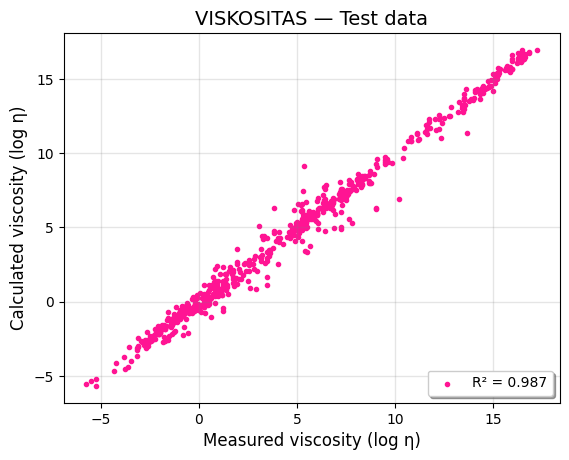

In [71]:
# visualization — evaluate test data

plt.scatter(x = yt, y = modelo.predict(xt),
label = f'R² = {round(r2_score(yt, modelo.predict(xt)), 4)}',
marker = '.', color = 'deeppink')
plt.xlabel('Measured viscosity (log η)', size = 12)
plt.ylabel('Calculated viscosity (log η)', size = 12)
plt.legend(loc = 'lower right', shadow = True)
plt.title('VISKOSITAS — Test data', size=14)
plt.grid(alpha = 0.2, color = 'grey', linewidth = 1, linestyle = '-')
plt.show()

In [72]:
# contact and reference

In [ ]:
"""
Contact:

E-mail: patrick.dosanjos@outlook.com
Linkedin: https://www.linkedin.com/in/patrick-queiroz-dos-anjos/

Reference

Mills, K.C., Karagadde, S., Lee, P.D., Yuan, L., Shahbazian, F.
Calculation of Physical Properties for Use in Models of Continuous Casting Process Part 1 Mould Slags.
ISIJ International. v. 56. n. 2, p. 264-273, 2016.
"""